# Lab 4: Linear Regression Models

### Author: Quentin Smith
### Date: 2/16/20

## 1. Overview

Our objective for this lab is to create and analyze Linear Regression Models. 

Linear regression attempts to model the relationship between two vaiables by fitting a linear equation to observed data [1]. Linear regression shows whether there  is some sort of significant association between two varaiables. The most common regression is called Least-Squares Regression. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line [1]. In other words it choses the best line in the form Y = mX + b where X is the explanatory varable, Y is the dependent variable, m is the slope of the line, and b is the y-intercept, that minimizes the distance from each data point to the line it chooses. 

The line that is created can now be used for extrapolation. Attemting to use the regression equation to predict values outside of the range of data is often inappropriate [1]. 

Resources:
1. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm
2. https://datatofish.com/multiple-linear-regression-python/

## 2. Data

We will be working with scaled diabetes data from datasets.load_diabetes(). Original data is from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt Below is an expanded description of the dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns; sns.set()

In [ ]:
diabetes = datasets.load_diabetes()
type(diabetes)

df_notscaled = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Exploratory Data Analysis

Let us first explore the data set a little bit. We will be looking at the shape, indication of NaNs, numeric independent variables, histogram of target variables, scatterplot of independent variables (at least BMI), correlation matrix.

In [ ]:
#create a dataframe with data inport
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)  
df_x = df # will use later
#Shape of data
df.shape

(442, 10)

Just as the description in the data said the shape of the data frame is 443 data rows with 10 columns. We know the names of the columns from the description but let us see some of the table. Remember the data is scaled so the numbers present under each column might not look like the right data the should be stored. 

In [ ]:
#return the first 20 rows of the data frame
df.head(20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [ ]:
#check for NaN's
df.isnull().values.any()

False

As we can see from the check I did above all positions in the table have an entry of a number.

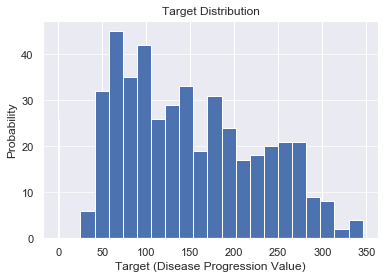

In [ ]:
plt.hist(x = diabetes.target, bins = 20)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')
plt.show()

Looking at the histogram of the target (disease progression value) we see that it is right scewed. Next we will look at the scatter plot of the independent variables (BMI, Age, BP, S1, S2, S3, S4, S5, S6

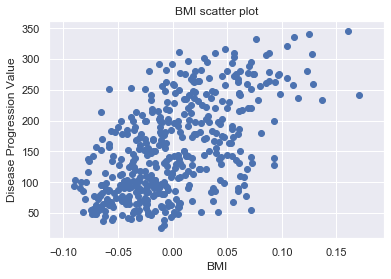

In [ ]:
plt.scatter(df.bmi, diabetes.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()


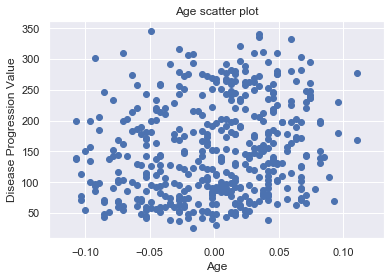

In [ ]:
plt.scatter(df.age, diabetes.target)

plt.xlabel('Age')
plt.ylabel('Disease Progression Value')
plt.title('Age scatter plot')
plt.show()

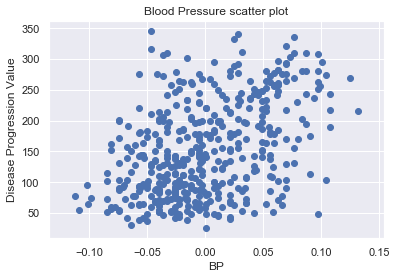

In [ ]:
plt.scatter(df.bp, diabetes.target)

plt.xlabel('BP')
plt.ylabel('Disease Progression Value')
plt.title('Blood Pressure scatter plot')
plt.show()

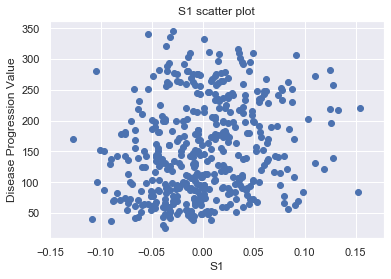

In [ ]:
plt.scatter(df.s1, diabetes.target)

plt.xlabel('S1')
plt.ylabel('Disease Progression Value')
plt.title('S1 scatter plot')
plt.show()

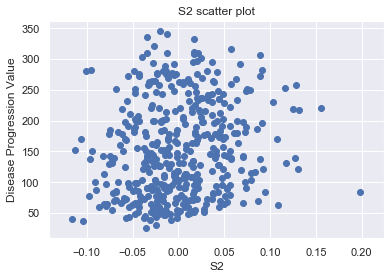

In [ ]:
plt.scatter(df.s2, diabetes.target)

plt.xlabel('S2')
plt.ylabel('Disease Progression Value')
plt.title('S2 scatter plot')
plt.show()

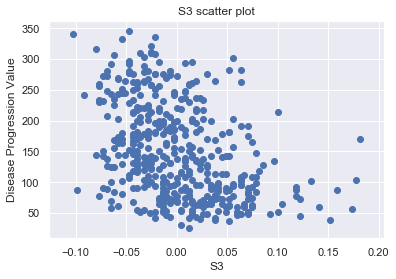

In [ ]:
plt.scatter(df.s3, diabetes.target)

plt.xlabel('S3')
plt.ylabel('Disease Progression Value')
plt.title('S3 scatter plot')
plt.show()

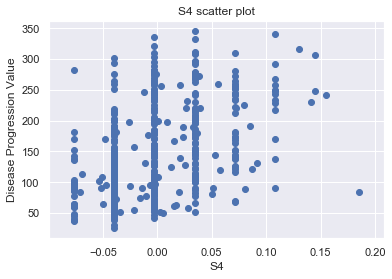

In [ ]:
plt.scatter(df.s4, diabetes.target)

plt.xlabel('S4')
plt.ylabel('Disease Progression Value')
plt.title('S4 scatter plot')
plt.show()

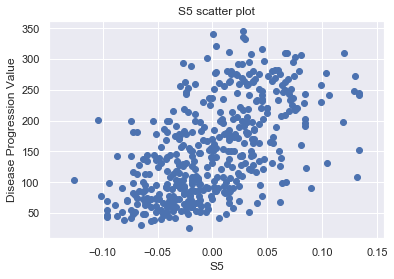

In [ ]:
plt.scatter(df.s5, diabetes.target)

plt.xlabel('S5')
plt.ylabel('Disease Progression Value')
plt.title('S5 scatter plot')
plt.show()

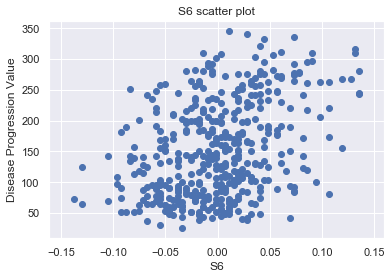

In [ ]:
plt.scatter(df.s6, diabetes.target)

plt.xlabel('S6')
plt.ylabel('Disease Progression Value')
plt.title('S6 scatter plot')
plt.show()

The scatterplot shows some correlation between independent variables and disease progression value. We can see a slight positive correlation in BMI, BP, and S5. We can also see a slight negative correlation in S3.

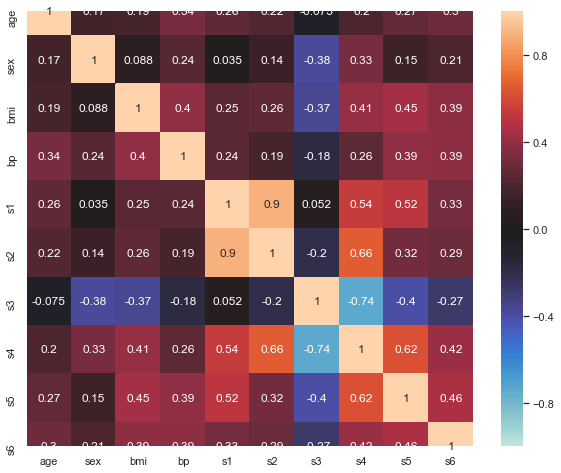

In [ ]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
fig, ax = plt.subplots(figsize=(10,8))
corrmat = df.corr() # Omit year
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);


Looking at a correlation matrix we can see that there are correlations between the independent variables. The strongest correlation we see is between S2 and S1. The largest negative correlation we have is S4 and S3.

I do think there is a collinearity between S2 and S1. 

## Models

After exploring the data we are now going to create a single linear regression model with BMI as the independent variable and Disease Progression Value as the dependent variable. 

rvalue: 0.5864501344746886
Y = 949.4352603839493x + 152.1334841628967
pvalue: 3.4660064451673e-42


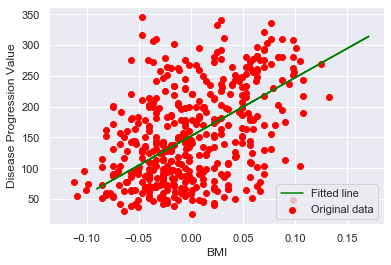

In [ ]:
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(df.bmi, diabetes.target)
plt.scatter(df.bp, diabetes.target, color="red", marker="o", label="Original data")
y_pred = intercept + slope*df.bmi
plt.plot(df.bmi,y_pred, color="green", label="Fitted line")
plt.legend(loc='best')
plt.xlabel('BMI') 
plt.ylabel('Disease Progression Value') 

print('rvalue:', rvalue)
print('Y = ' + slope.astype(str)  + 'x + ' + intercept.astype(str) )
print('pvalue:', pvalue)

The p value on the data is below 0.5. Due to the nature of this data I am not sure whether or not to accept this model or not. With an rvalue of 0.58 we can see there is a correlation but we do not know the subject matter well enough.

In [ ]:
X = df[['age','bmi','bp','s1','s2','s3','s4','s5','s6']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = diabetes['target']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 152.13348416289654
Coefficients: 
 [ -33.17908443  557.05563968  276.08597885 -712.80600901  420.56723538
  139.51068741  126.28036655  756.36909789   48.91700756]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     48.11
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           8.80e-60
Time:                        23:29:31   Log-Likelihood:                -2393.7
No. Observations:                 442   AIC:                             4807.
Df Residuals:                     432   BIC:                             4848.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The model accuracy is 0.490 for adjusted R-squared. The formula coefficients and intercept can be found above for the output formula.  Again I don't know enough about the data to make a jusgement call on whether or not to accept the model or not.

In [ ]:
X = df[['bmi','bp', 's5']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = diabetes['target']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 152.1334841628966
Coefficients: 
 [603.07435575 262.27488392 543.87245014]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           7.16e-62
Time:                        23:29:40   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


I wanted to see the difference when you take out the independent variables that do not seem to have any correlation associated with them. I kept three that had a slight positive correlation when looking at the scatterplots. The R-squared value went down to 0.477. The coefficients and intercept are above which can be used to find the formula for this regression model. I do not have enough knowledge on whether or not to reject or accept this model. I do not know what is a good r squared value in real world data. 

## Conclusions

Analyzing data using Linear Regression is a common statistical tool to find correlation between independent and dependent data. 

This week I had trouble even implementing the things in class. It takes a lot longer for debugging than I thought while performing these analysis. Trying to run the same multiple linear regression as in inclass4 I end up getting errors due to undefined variables. The probelm is when looking through the inClass jupyter notebook I was not able to find where we define the variable. 

I decided to use the same model I found online using sklearn. I took the model and used all independent variables versus the ones that showed slight correlations when looking at the scatter plots. In this case the R-squared value went down from using all the data to just three of the independent variables. I would have guessed it to be higher. 

There were a lot of things I wanted to try but I couldn't get the different linear regression models to work. I think I just need more time to mess around with various linear regression models from sklearn, numpy, statsmodels. 